# Faults visualization

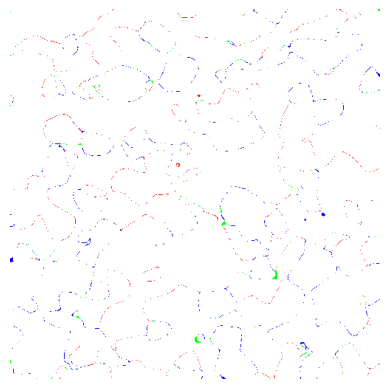

In [56]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the images
predicted_mask = Image.open('predicted_mask.png')
true_mask = Image.open('true_mask.png')
original_image = Image.open('original_image.png')

# Convert images to grayscale
predicted_mask = predicted_mask.convert('L')
true_mask = true_mask.convert('L')
original_image = original_image.convert('RGB')

# Ensure the images are the same size
if predicted_mask.size != true_mask.size:
    print("Images are not the same size. Resizing predicted_mask...")
    predicted_mask = predicted_mask.resize(true_mask.size)

# Convert images to numpy arrays
predicted_mask_array = np.array(predicted_mask)
true_mask_array = np.array(true_mask)

# Calculate the difference
difference = predicted_mask_array - true_mask_array

# Create an empty RGB image to visualize the faults
faults = np.ones((*predicted_mask_array.shape, 3), dtype=np.uint8)*255

# Assign different colors to the faults for each class
faults[(predicted_mask_array == 0) & (true_mask_array != 0)] = [255, 0, 0]   # Red for class 1
faults[(predicted_mask_array == 127) & (true_mask_array != 127)] = [0, 255, 0]   # Green for class 2
faults[(predicted_mask_array == 255) & (true_mask_array != 255)] = [0, 0, 255]   # Blue for class 3

# Convert faults back to image
faults_image = Image.fromarray(faults)

# # Display the faults
# %matplotlib inline

# Display the faults image
size = faults_image.size[0]
plt.imshow(faults_image)
plt.axis('off')  # to hide the axis
plt.show()

faults_image.save('faults.png')

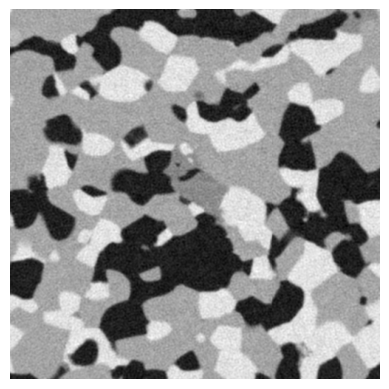

In [57]:
plt.imshow(original_image)
plt.axis('off')  # to hide the axis
plt.show()

(501, 501, 3)


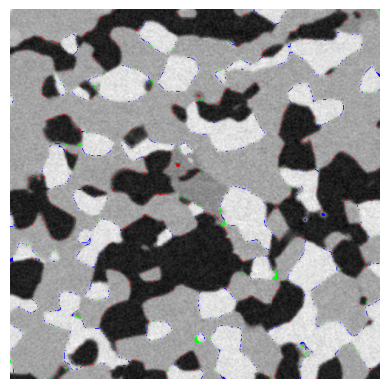

In [58]:
# Convert PIL Images to numpy arrays
original_array = np.array(original_image)
faults_array = np.array(faults_image)

# Create a mask where faults_array is not [0, 0, 0]
maskR = np.all(faults_array == [255, 0, 0], axis=-1)
maskG = np.all(faults_array == [0, 255, 0], axis=-1)
maskB = np.all(faults_array == [0, 0, 255], axis=-1)

# Create a new array for the overlay image
overlay_array = original_array.copy()

# Set the pixels of the overlay image to be those of the faults image where the mask is True
overlay_array[maskR] = [255,0,0]
overlay_array[maskG] = [0,255,0]
overlay_array[maskB] = [0,0,255]

print(overlay_array.shape)
# Convert the overlay array back to a PIL Image
overlay_image = Image.fromarray(overlay_array, mode='RGB')

# Display the overlay image
plt.imshow(overlay_image)
plt.axis('off')  # to hide the axis
plt.show()

# Save the overlay image
overlay_image.save('overlay.png')


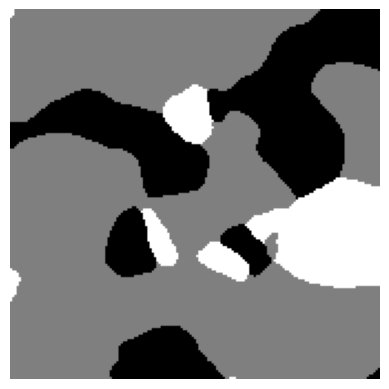

In [59]:
# Subsection of the true image
true_image = Image.open('true_mask.png')
true_subsection = true_image.crop((0, 0, size/3, size/3))
plt.imshow(true_subsection)
plt.axis('off')  # to hide the axis
plt.show()

true_subsection.save('true_subsection.png')

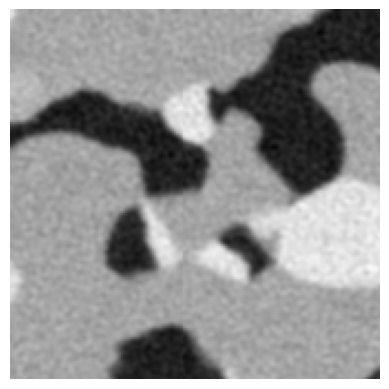

In [60]:
# Subsection of the faults image
original_subsection = original_image.crop((0, 0, size/3, size/3))
plt.imshow(original_subsection)
plt.axis('off')  # to hide the axis
plt.show()

original_subsection.save('original_subsection.png')

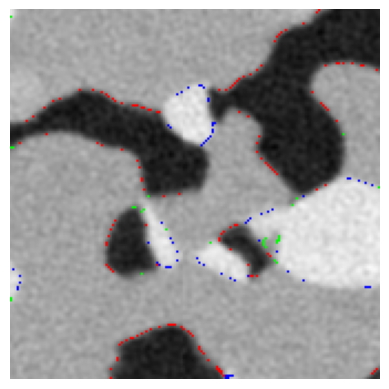

In [61]:
overlay_subsection = overlay_image.crop((0, 0, size/3, size/3))
plt.imshow(overlay_subsection)
plt.axis('off')  # to hide the axis
plt.show()

overlay_subsection.save('overlay_subsection.png')

# Confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Flatten the arrays
predicted_mask_flat = predicted_mask_array.ravel()
true_mask_flat = true_mask_array.ravel()

# Compute the confusion matrix
cm = confusion_matrix(true_mask_flat, predicted_mask_flat)

# Compute the confusion matrix
cm = confusion_matrix(true_mask_flat, predicted_mask_flat)

# Print the confusion matrix
print(cm)

[[ 73415     99    194]
 [   826 119403   1055]
 [    77    307  55625]]


Normalized confusion matrix
[[0.99602485 0.00134314 0.00263201]
 [0.00681046 0.98449095 0.00869859]
 [0.00137478 0.00548126 0.99314396]]


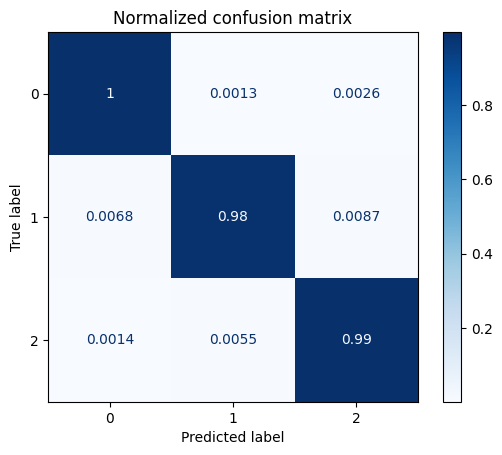

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

title = "Normalized confusion matrix"
disp = ConfusionMatrixDisplay.from_predictions(
    true_mask_flat,
    predicted_mask_flat,
    display_labels=[0, 1, 2],
    cmap=plt.cm.Blues,
    normalize="true",
)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()
disp.figure_.savefig("confusion_matrix.png")